In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/cleaned_weather.csv')
print(df.head())

                  date        p     T    Tpot  Tdew    rh  VPmax  VPact  \
0  2020-01-01 00:10:00  1008.89  0.71  273.18 -1.33  86.1   6.43   5.54   
1  2020-01-01 00:20:00  1008.76  0.75  273.22 -1.44  85.2   6.45   5.49   
2  2020-01-01 00:30:00  1008.66  0.73  273.21 -1.48  85.1   6.44   5.48   
3  2020-01-01 00:40:00  1008.64  0.37  272.86 -1.64  86.3   6.27   5.41   
4  2020-01-01 00:50:00  1008.61  0.33  272.82 -1.50  87.4   6.26   5.47   

   VPdef    sh  ...      rho    wv  max. wv     wd  rain  raining  SWDR  PAR  \
0   0.89  3.42  ...  1280.62  1.02     1.60  224.3   0.0      0.0   0.0  0.0   
1   0.95  3.39  ...  1280.33  0.43     0.84  206.8   0.0      0.0   0.0  0.0   
2   0.96  3.39  ...  1280.29  0.61     1.48  197.1   0.0      0.0   0.0  0.0   
3   0.86  3.35  ...  1281.97  1.11     1.48  206.4   0.0      0.0   0.0  0.0   
4   0.79  3.38  ...  1282.08  0.49     1.40  209.6   0.0      0.0   0.0  0.0   

   max. PAR   Tlog  
0       0.0  11.45  
1       0.0  11.51  
2    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
# Μετατροπή της στήλης date σε τύπο datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ορισμός της date στήλης ως index
df.set_index('date', inplace=True)

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48136 entries, 2020-01-01 00:10:00 to 2020-11-30 08:00:00
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p         48136 non-null  float64
 1   T         48136 non-null  float64
 2   Tpot      48136 non-null  float64
 3   Tdew      48136 non-null  float64
 4   rh        48136 non-null  float64
 5   VPmax     48136 non-null  float64
 6   VPact     48136 non-null  float64
 7   VPdef     48136 non-null  float64
 8   sh        48136 non-null  float64
 9   H2OC      48136 non-null  float64
 10  rho       48136 non-null  float64
 11  wv        48136 non-null  float64
 12  max. wv   48136 non-null  float64
 13  wd        48136 non-null  float64
 14  rain      48136 non-null  float64
 15  raining   48136 non-null  float64
 16  SWDR      48136 non-null  float64
 17  PAR       48136 non-null  float64
 18  max. PAR  48136 non-null  float64
 19  Tlog      48135 non-null  float6

In [6]:
# Επαναδειγματοληψία σε ημερήσια βάση χρησιμοποιώντας τον μέσο όρο
daily_df = df.resample('D').mean()

print(daily_df.head())

                      p         T        Tpot      Tdew         rh     VPmax  \
date                                                                           
2020-01-01  1006.958811 -0.514196  272.106084 -2.569231  86.429301  5.961748   
2020-01-02  1001.050972 -1.056319  272.024167 -4.215069  80.206042  5.853056   
2020-01-03   993.802917  4.835278  278.491042  2.006806  81.975000  8.721319   
2020-01-04   998.244236  3.784931  277.084583  0.785764  80.899861  8.038264   
2020-01-05  1007.105347  2.735000  275.336458 -1.018611  76.422639  7.446458   

               VPact     VPdef        sh      H2OC          rho        wv  \
date                                                                        
2020-01-01  5.066923  0.894545  3.136154  5.031888  1284.242238  0.783287   
2020-01-02  4.513333  1.339722  2.809931  4.509653  1279.685069  1.173403   
2020-01-03  7.114236  1.607569  4.465694  7.160069  1242.085694  3.927153   
2020-01-04  6.485694  1.553333  4.050694  6.497083  12

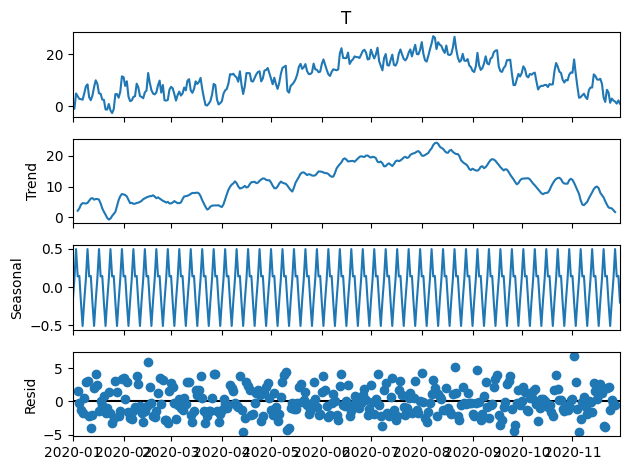

In [7]:
target = 'T'
result = seasonal_decompose(daily_df[target], model='additive', period=7)
result.plot()
plt.tight_layout()
plt.show()

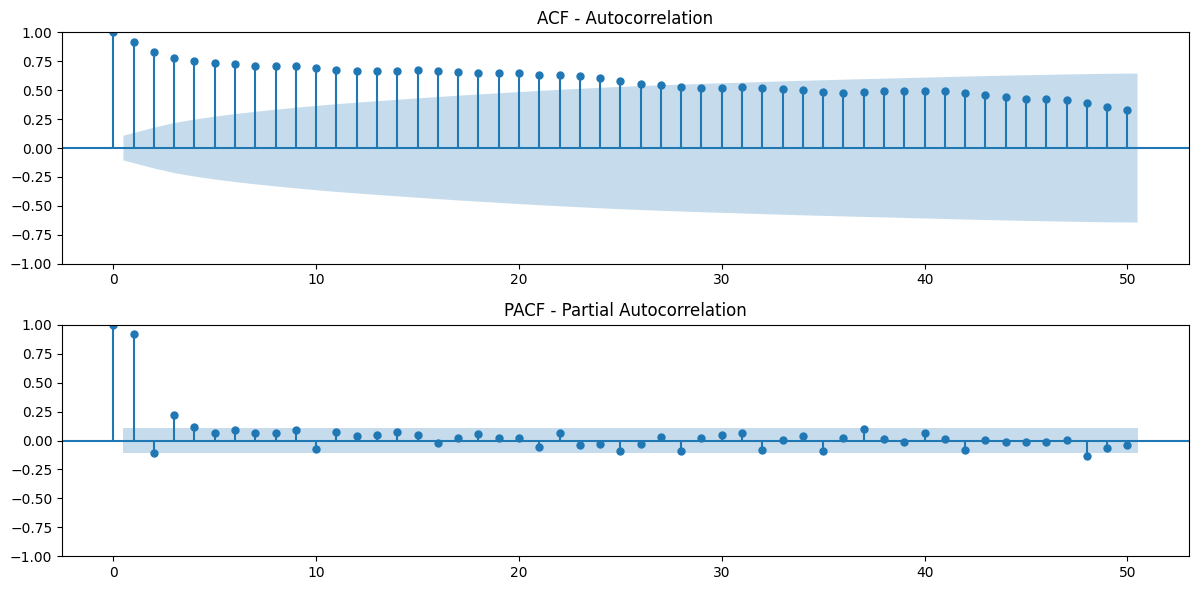

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(daily_df[target].dropna(), lags=50, ax=ax[0])
plot_pacf(daily_df[target].dropna(), lags=50, ax=ax[1])
ax[0].set_title('ACF - Autocorrelation')
ax[1].set_title('PACF - Partial Autocorrelation')
plt.tight_layout()
plt.show()

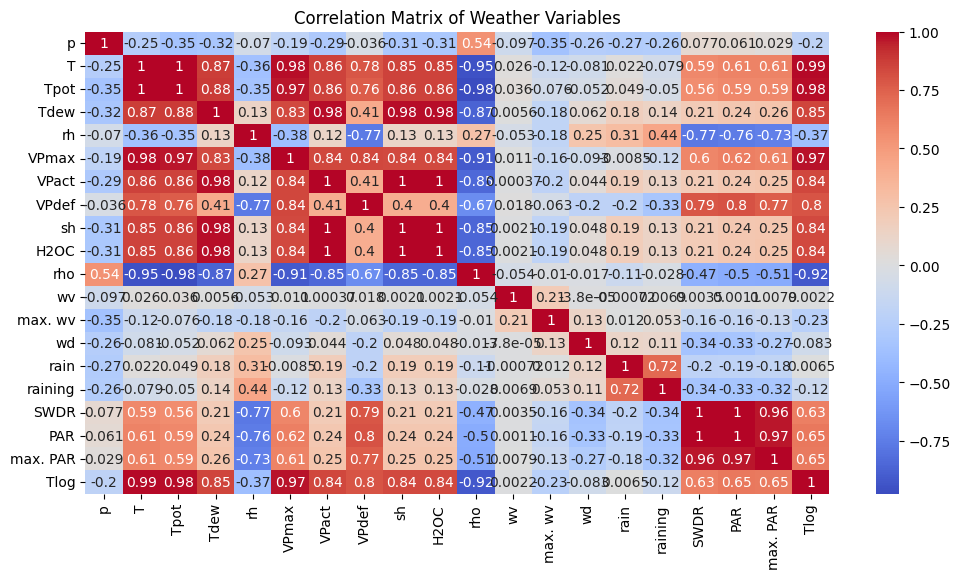

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(daily_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Variables')
plt.show()

In [10]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Επιλογή target μεταβλητής (T) και αφαίρεση NaN
ts = daily_df['T'].dropna()

# Χωρισμός σε train/test
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

In [11]:
# Καθορισμός lags
model = AutoReg(train, lags=7)
model_fit = model.fit()
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                      T   No. Observations:                  268
Model:                     AutoReg(7)   Log Likelihood                -586.158
Method:               Conditional MLE   S.D. of innovations              2.286
Date:                Fri, 20 Jun 2025   AIC                           1190.316
Time:                        19:46:29   BIC                           1222.397
Sample:                    01-08-2020   HQIC                          1203.212
                         - 09-24-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6089      0.309      1.972      0.049       0.004       1.214
T.L1           0.9552      0.062     15.510      0.000       0.835       1.076
T.L2          -0.2836      0.085     -3.322      0.0

In [12]:
# Πρόβλεψη για τις επόμενες τιμές του test set
predictions = model_fit.predict(start=len(train), end=len(ts)-1, dynamic=False)

# Μετρικές αξιολόγησης
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
smape = 100 * np.mean(2 * np.abs(test - predictions) / (np.abs(test) + np.abs(predictions)))


print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"SMAPE: {smape:.2f}%")


MAE: 7.234
RMSE: 8.178
SMAPE: 67.20%


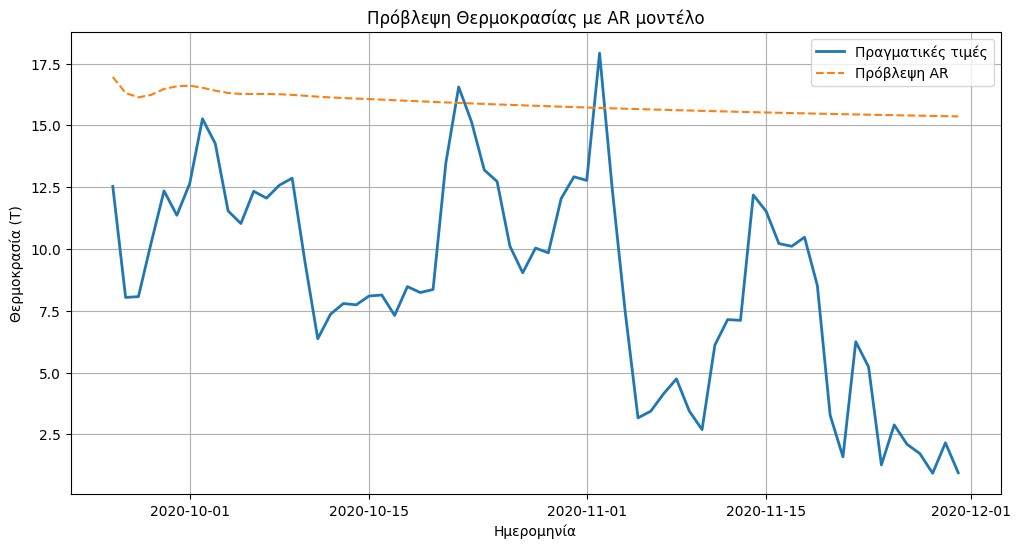

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Πραγματικές τιμές', linewidth=2)
plt.plot(test.index, predictions, label='Πρόβλεψη AR', linestyle='--')
plt.title('Πρόβλεψη Θερμοκρασίας με AR μοντέλο')
plt.xlabel('Ημερομηνία')
plt.ylabel('Θερμοκρασία (T)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Χρήση μόνο της T
ts = daily_df['T'].dropna().values.reshape(-1, 1)

# Κανονικοποίηση
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

# Συνάρτηση για δημιουργία sequence samples
def create_sequences(data, window_size, horizon):
    X, y = [], []
    for i in range(len(data) - window_size - horizon):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size + horizon - 1])
    return np.array(X), np.array(y)

# Ορίζουμε το παράθυρο
window_size = 7

# Κανονικοποίηση θερμοκρασίας
ts = daily_df['T'].dropna().values.reshape(-1, 1)
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

window_size = 7
horizons = [1, 3, 7]



 Πρόβλεψη για +1 ημέρα/ες μπροστά:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MAE: 1.95, RMSE: 2.59, SMAPE: 27.55%


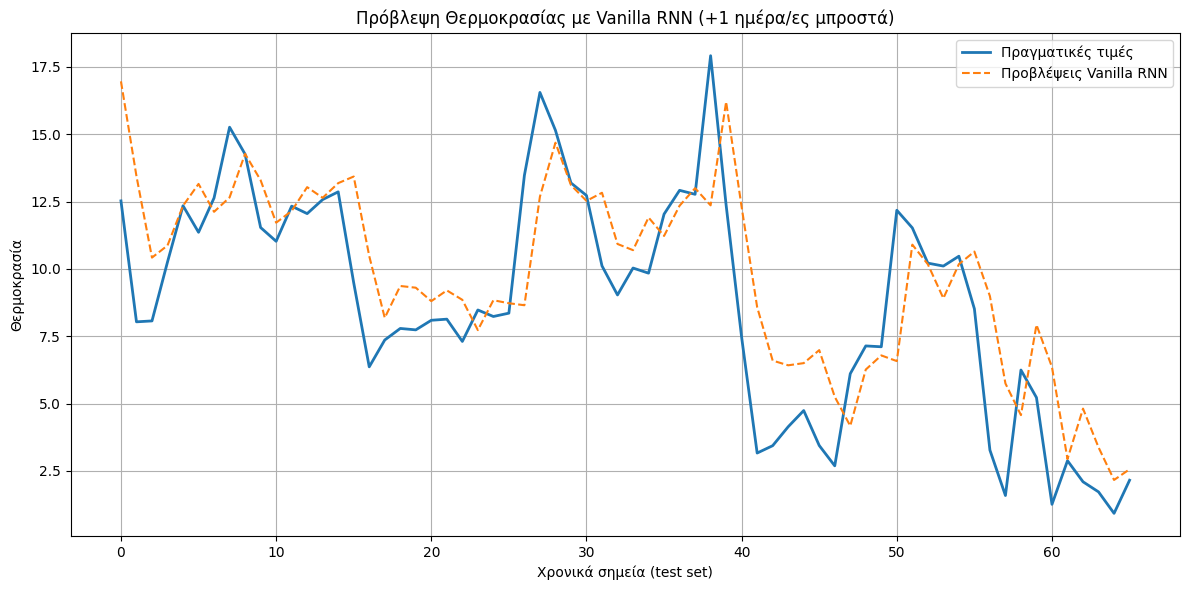


 Πρόβλεψη για +3 ημέρα/ες μπροστά:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MAE: 3.55, RMSE: 4.47, SMAPE: 44.60%


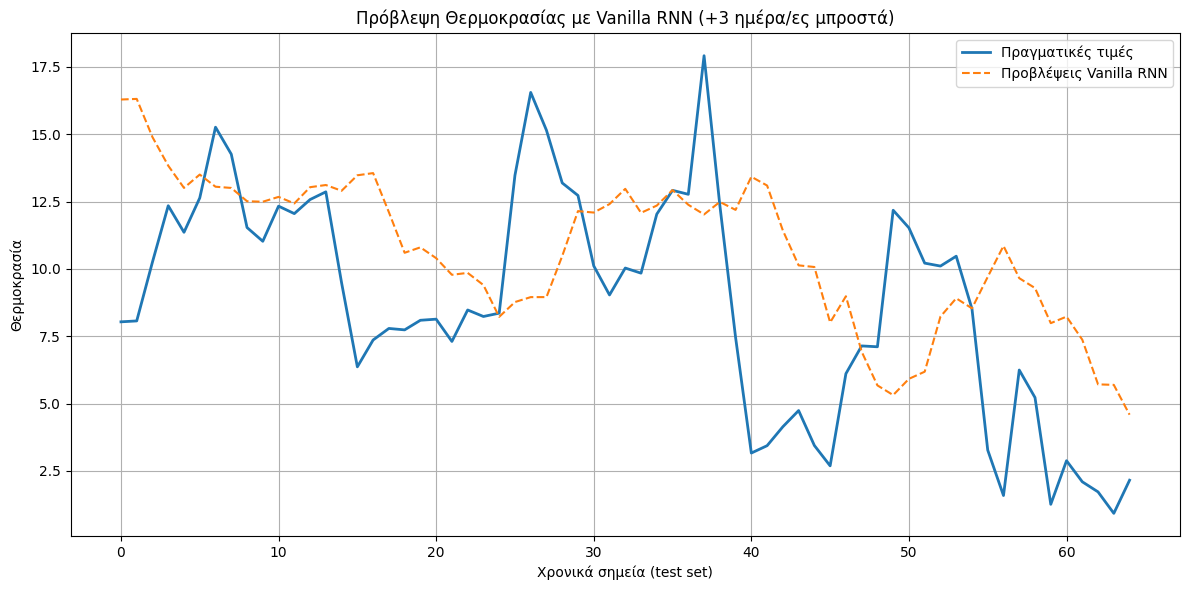


 Πρόβλεψη για +7 ημέρα/ες μπροστά:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
MAE: 4.91, RMSE: 5.81, SMAPE: 53.88%


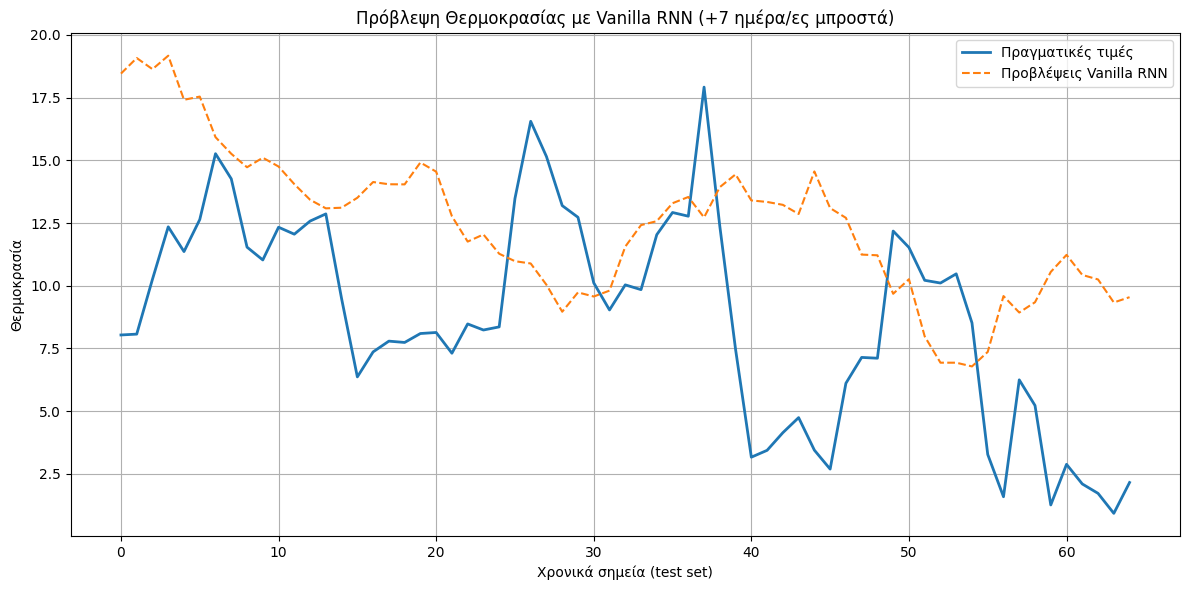

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

for horizon in horizons:
    print(f"\n Πρόβλεψη για +{horizon} ημέρα/ες μπροστά:")

    X, y = create_sequences(ts_scaled, window_size, horizon)

    # Train/test
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Μοντέλο Vanilla RNN
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=0)

    # Πρόβλεψη
    y_pred = model.predict(X_test)

    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred).flatten()

    #Αξιολόγηση
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    smape = 100 * np.mean(2 * np.abs(y_test_inv - y_pred_inv) / (np.abs(y_test_inv) + np.abs(y_pred_inv)))

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%")


    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Πραγματικές τιμές', linewidth=2)
    plt.plot(y_pred_inv, label='Προβλέψεις Vanilla RNN', linestyle='--')
    plt.title(f'Πρόβλεψη Θερμοκρασίας με Vanilla RNN (+{horizon} ημέρα/ες μπροστά)')
    plt.xlabel('Χρονικά σημεία (test set)')
    plt.ylabel('Θερμοκρασία')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Softmax

class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(inputs, self.W) + self.b)
        a = Softmax(axis=1)(e)
        output = tf.reduce_sum(inputs * a, axis=1)
        return output



 Πρόβλεψη για +1 ημέρα/ες μπροστά:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
MAE: 3.03, RMSE: 3.85, SMAPE: 39.33%


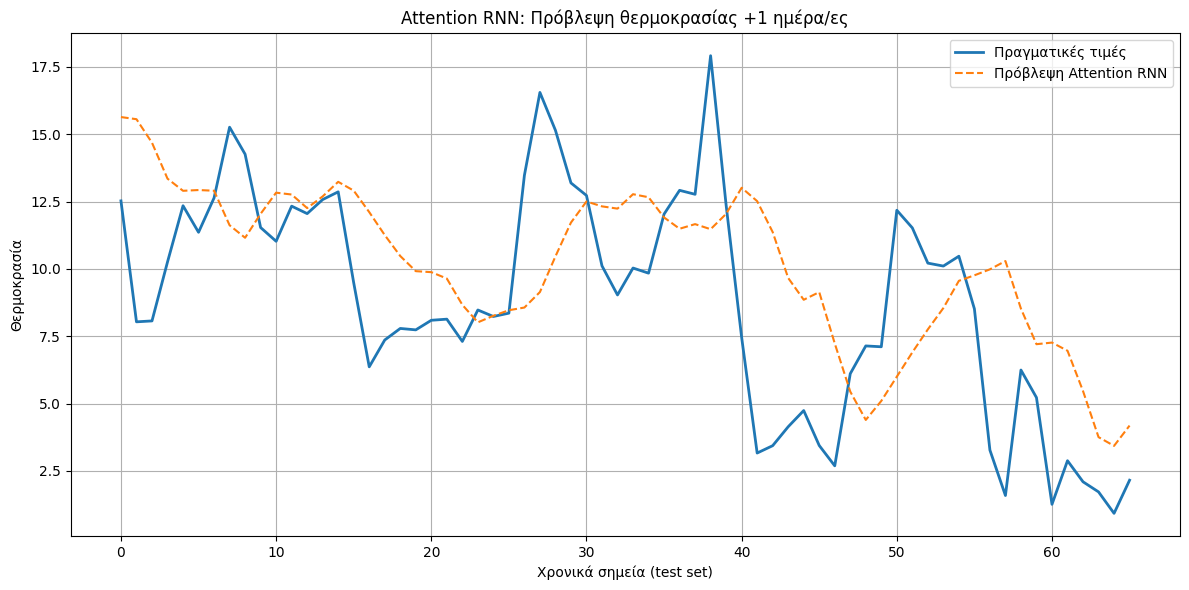


 Πρόβλεψη για +3 ημέρα/ες μπροστά:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
MAE: 3.80, RMSE: 4.66, SMAPE: 47.22%


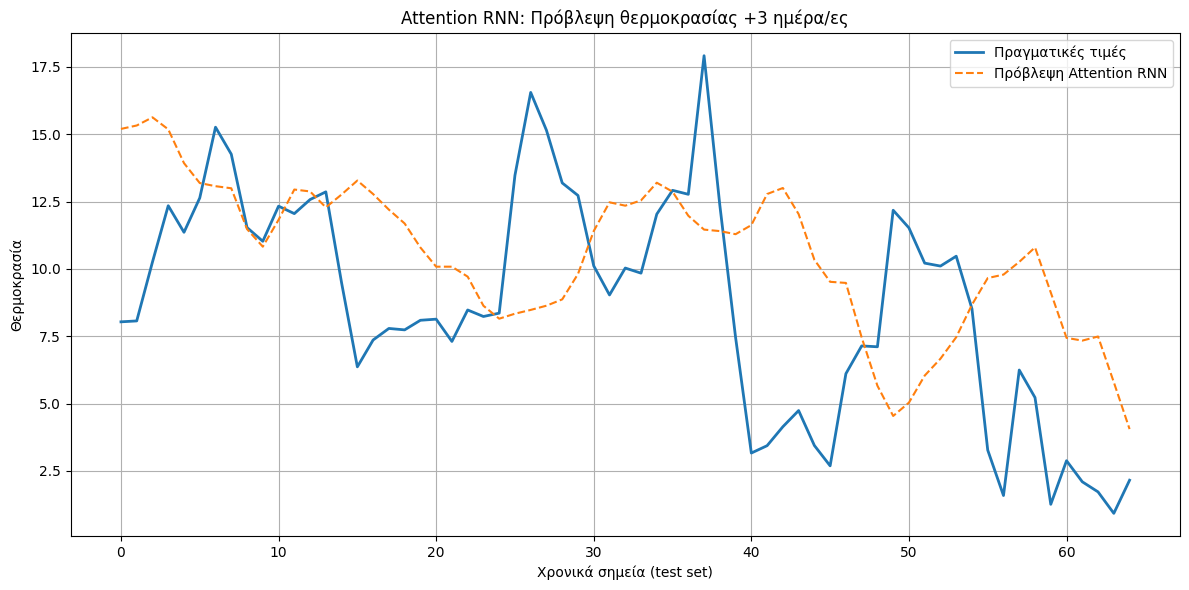


 Πρόβλεψη για +7 ημέρα/ες μπροστά:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
MAE: 4.96, RMSE: 5.86, SMAPE: 54.22%


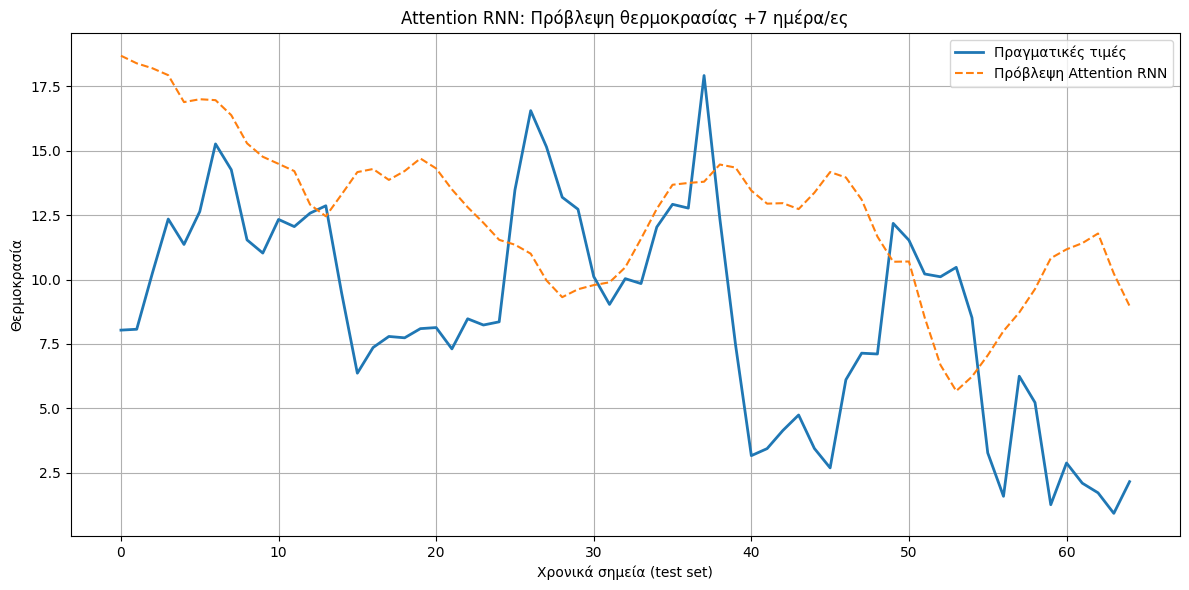

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense

for horizon in horizons:
    print(f"\n Πρόβλεψη για +{horizon} ημέρα/ες μπροστά:")

    X, y = create_sequences(ts_scaled, window_size, horizon)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Μοντέλο με RNN + Attention
    input_layer = Input(shape=(window_size, 1))
    rnn_output = SimpleRNN(64, return_sequences=True)(input_layer)
    attention_output = Attention()(rnn_output)
    output = Dense(1)(attention_output)
    model = Model(inputs=input_layer, outputs=output)

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=0)

    # Πρόβλεψη
    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred).flatten()

    # Αξιολόγηση
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    smape = 100 * np.mean(2 * np.abs(y_test_inv - y_pred_inv) / (np.abs(y_test_inv) + np.abs(y_pred_inv)))

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%")

    # Διάγραμμα
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Πραγματικές τιμές', linewidth=2)
    plt.plot(y_pred_inv, label='Πρόβλεψη Attention RNN', linestyle='--')
    plt.title(f'Attention RNN: Πρόβλεψη θερμοκρασίας +{horizon} ημέρα/ες')
    plt.xlabel('Χρονικά σημεία (test set)')
    plt.ylabel('Θερμοκρασία')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from tensorflow.keras.models import Model
import numpy as np

In [19]:
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(angle_rads, dtype=tf.float32)

In [20]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-head self-attention
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed-forward
    x_ff = Dense(ff_dim, activation='relu')(x)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    x = Dropout(dropout)(x_ff)
    return LayerNormalization(epsilon=1e-6)(x + x_ff)

In [21]:
def build_transformer(window_size, d_model=64, num_heads=4, ff_dim=128, dropout=0.1):
    inp = Input(shape=(window_size, 1))

    # Προσθήκη position encoding
    x = Dense(d_model)(inp)
    pos_enc = positional_encoding(window_size, d_model)
    x = x + pos_enc

    x = transformer_encoder(x, d_model, num_heads, ff_dim, dropout)
    x = transformer_encoder(x, d_model, num_heads, ff_dim, dropout)

    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    output = Dense(1)(x)

    model = Model(inputs=inp, outputs=output)
    model.compile(optimizer='adam', loss='mse')
    return model



 Transformer για +1 ημέρα/ες:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
MAE: 1.79, RMSE: 2.42, SMAPE: 25.88%


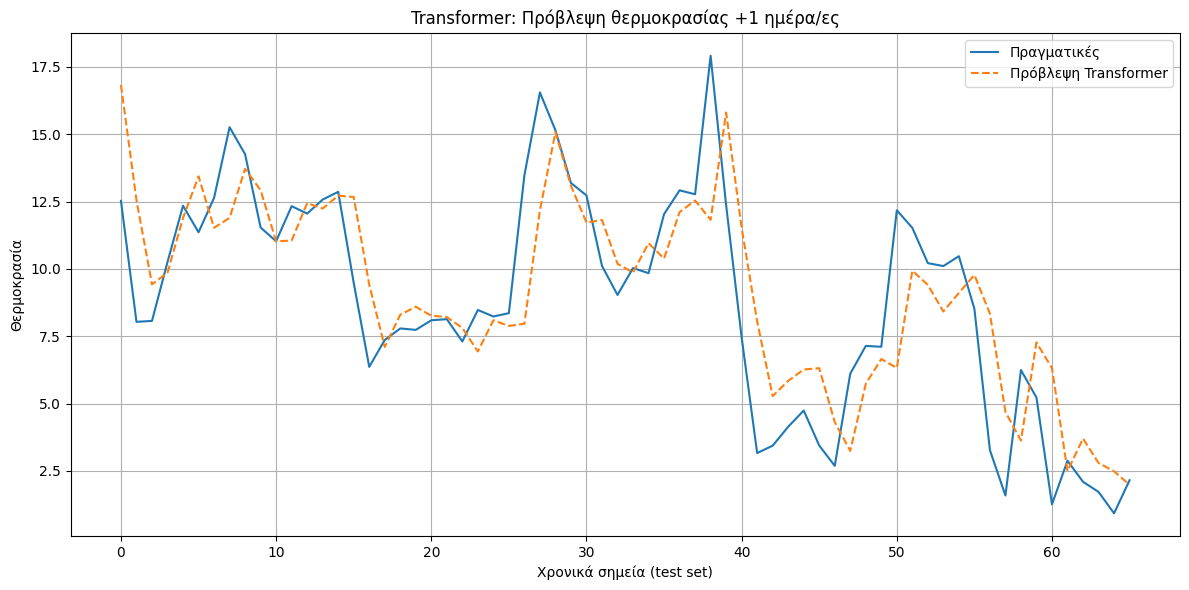


 Transformer για +3 ημέρα/ες:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step
MAE: 4.91, RMSE: 5.82, SMAPE: 53.38%


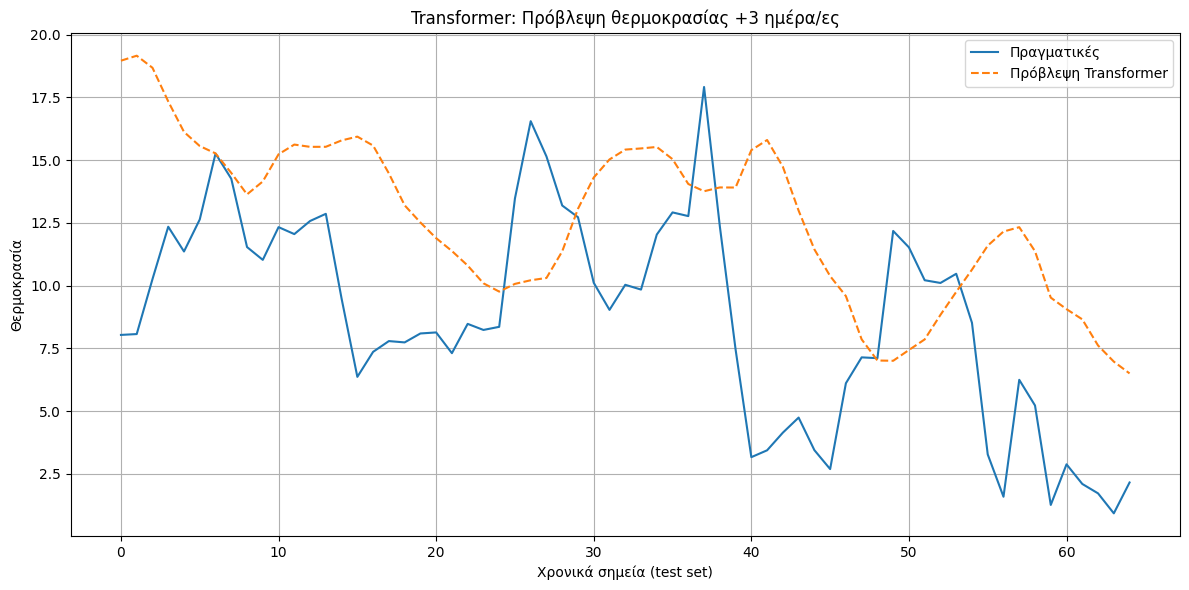


 Transformer για +7 ημέρα/ες:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
MAE: 4.53, RMSE: 5.32, SMAPE: 52.61%


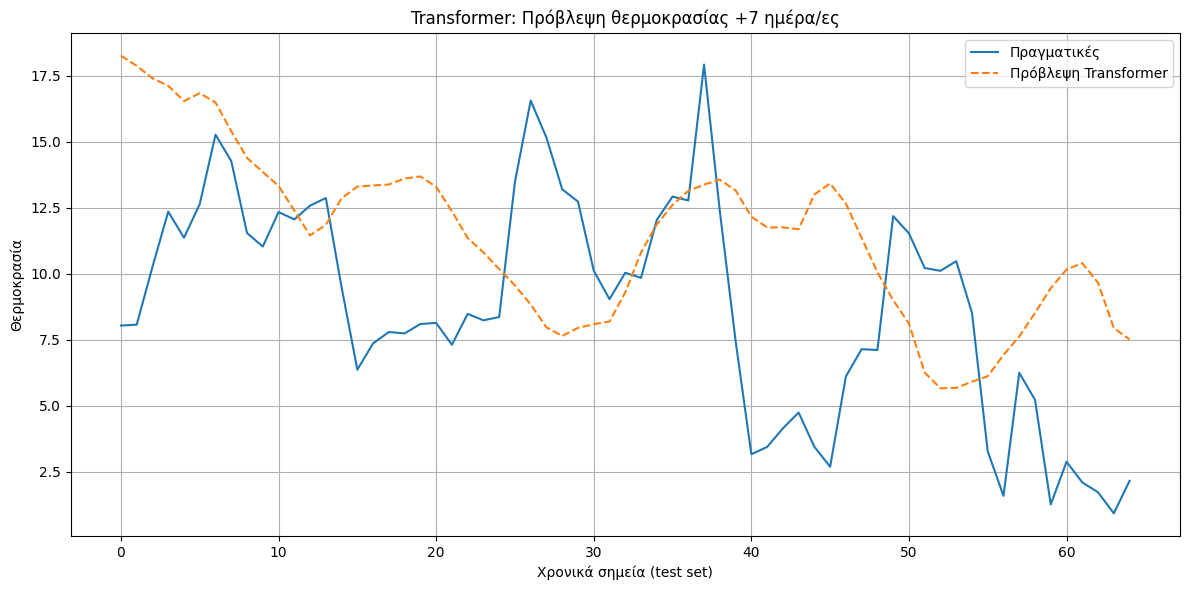

In [22]:
for horizon in [1, 3, 7]:
    print(f"\n Transformer για +{horizon} ημέρα/ες:")
    X, y = create_sequences(ts_scaled, window_size, horizon)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = build_transformer(window_size)
    model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=0)

    # Πρόβλεψη
    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred).flatten()

    # Μετρικές
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    smape = 100 * np.mean(2 * np.abs(y_test_inv - y_pred_inv) / (np.abs(y_test_inv) + np.abs(y_pred_inv)))

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape:.2f}%")

    # Διάγραμμα
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label='Πραγματικές')
    plt.plot(y_pred_inv, label='Πρόβλεψη Transformer', linestyle='--')
    plt.title(f'Transformer: Πρόβλεψη θερμοκρασίας +{horizon} ημέρα/ες')
    plt.xlabel('Χρονικά σημεία (test set)')
    plt.ylabel('Θερμοκρασία')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
